## Teoria

## Pratica

### Import Libraries

In [ ]:
import numpy as np
import math
import re
import pandas as pd
from bs4 import BeautifulSoup
from google.colab import drive
import zipfile
import seaborn as sns
import spacy as sp
import string
import random
import matplotlib.pyplot as plt

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.15.0'

In [ ]:
from tensorflow.keras import layers
import tensorflow_datasets as tfds

### Pré Processamento dos dados

#### Import dataset

In [ ]:
drive.mount('/content/drive')

caminho_arquivo_train = '/content/drive/MyDrive/trainingandtestdata/trainingandtestdata/train.csv'
caminho_arquivo_test = '/content/drive/MyDrive/trainingandtestdata/trainingandtestdata/test.csv'



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cols = ['sentiment', 'id', 'date', 'query', 'user', 'text']


In [ ]:
train_data = pd.read_csv(caminho_arquivo_train,
                         header=None,
                         names=cols,
                         engine="python",
                         encoding="latin1"
)

In [ ]:
train_data.shape

(1600000, 6)

In [ ]:
test_data = pd.read_csv(caminho_arquivo_test,
                        header=None,
                        names=cols,
                        engine="python",
                        encoding="latin1"
)


In [ ]:
test_data.head()

,sentiment,id,date,query,user,text
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


In [ ]:
test_data.shape

(498, 6)

In [ ]:
test_data.sentiment.unique()

array([4, 0, 2])

<Axes: ylabel='count'>

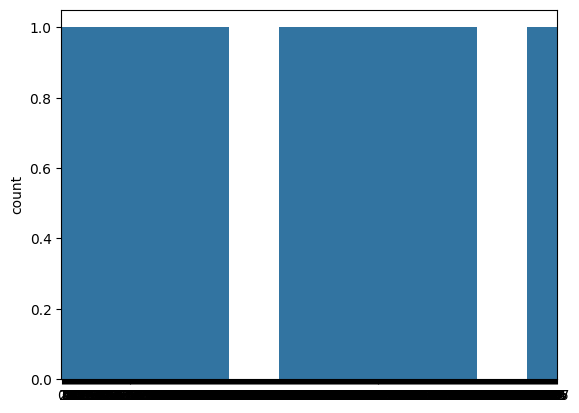

In [ ]:
sns.countplot(test_data.sentiment)

#### Pré-processamento

#### Limepza

In [ ]:
data = train_data

In [ ]:
data.drop(['id', 'date', 'query', 'user'], axis = 1, inplace=True)

In [ ]:
data.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
X = data.iloc[:, 1].values

In [ ]:
X

array(["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
       "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
       '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
       ..., 'Are you ready for your MoJo Makeover? Ask me for details ',
       'Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur ',
       'happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H '],
      dtype=object)

In [ ]:
X.shape

(1600000,)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
y = data.iloc[:, 0].values

In [ ]:
y

array([0, 0, 0, ..., 4, 4, 4])

In [ ]:
y.shape

(1600000,)

In [ ]:
from sklearn.model_selection import train_test_split
X, _, y, _ = train_test_split(X, y, test_size=0.85, stratify = y)

In [ ]:
X.shape

(240000,)

In [ ]:
y.shape

(240000,)

In [ ]:
unique, counts = np.unique(y, return_counts=True)
unique, counts

(array([0, 4]), array([120000, 120000]))

In [ ]:
def clean_tweets(tweet):
  tweet = BeautifulSoup(tweet, 'lxml').get_text()

  tweet = re.sub(r"@[A-Za-z0-9]+", ' ', tweet)

  tweet = re.sub(r"https?://[A-Za-z0-9./]+", ' ', tweet)

  tweet = re.sub(r"[^a-zA-Z.!?]", ' ', tweet)

  tweet = re.sub(r" +", ' ', tweet)

  tweet = tweet.lower()

  document = nlp(tweet)

  words = []

  for token in document:
    words.append(token.text)

  words = [word for word in words if word not in stop_words and word not in string.punctuation]

  words = ' '.join([str(element) for element in words])

  return words

In [ ]:
text = "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [ ]:
text = clean_tweets(text)

text

'Awww that s a bummer. You shoulda got David Carr of Third Day to do it. D'

In [ ]:
nlp = sp.load('en_core_web_sm')

nlp

In [ ]:
stop_words = sp.lang.en.STOP_WORDS

In [ ]:
text2 = clean_tweets(text)

text2

'awww s bummer shoulda got david carr day d'

In [ ]:
data_clean = [clean_tweets(tweet) for tweet in X]


<ipython-input-93-d2fc32ccda9b>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  tweet = BeautifulSoup(tweet, 'lxml').get_text()


In [ ]:
data_labels = y

In [ ]:
data_labels[data_labels == 4] = 1

In [ ]:
np.unique(data_labels)

array([0, 1])

#### Tokenização

In [ ]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(data_clean, target_vocab_size=2**16)


In [ ]:
tokenizer.vocab_size

52870

In [ ]:
print(tokenizer.subwords)

In [ ]:
data_inputs = [tokenizer.encode(sentence) for sentence in data_clean]

#### Padding

In [ ]:
max_len = max([len(sentence) for sentence in data_inputs])

In [ ]:
data_inputs = tf.keras.preprocessing.sequence.pad_sequences(data_inputs, value = 0, padding = 'post', maxlen=max_len)

In [ ]:
data_inputs

array([[  708,  7673,   946, ...,     0,     0,     0],
       [   49,  2827,  3613, ...,     0,     0,     0],
       [    1,  4244, 42922, ...,     0,     0,     0],
       ...,
       [    1,     3, 43112, ...,     0,     0,     0],
       [  198,   430, 38854, ...,     0,     0,     0],
       [  249,   945, 20101, ...,     0,     0,     0]], dtype=int32)

#### Spliting into training/testing set

In [ ]:
train_inputs, test_inputs, train_labels, test_labels = train_test_split(data_inputs, data_labels, test_size=0.3, stratify = data_labels)

In [ ]:
train_inputs.shape

(168000, 65)

In [ ]:
train_labels.shape

(168000,)

In [ ]:
test_inputs.shape

(72000, 65)

In [ ]:
test_labels.shape

(72000,)

#### Construção do Modelo

In [ ]:
class DCNN(tf.keras.Model):
  # vocab_size = Tamanho do vocabulario
  # emb_dim = quantidade de colunas
  # nb_filters = quantidade de filtros
  # ffn_units = quantidade de neuronios
  # nb_classes = numero de classes
  # dropout_rate = número de neuronios a serem zerados caso tenha algum overfitting
  # training = Indica se é teste
  # name = indica o nome do modelo
  def __init__(self, vocab_size, emb_dim=128, nb_filters=50, ffn_units=512, nb_classes=2, dropout_rate=0.1, training=False, name="dcnn"):
    super(DCNN, self).__init__(name=name)

    self.embedding = layers.Embedding(vocab_size, emb_dim)

    self.bigram = layers.Conv1D(filters=nb_filters, kernel_size=2, padding='same', activation='relu') # Camada de Convolução

    self.trigram = layers.Conv1D(filters=nb_filters, kernel_size=3, padding='same', activation='relu')  # Camada de Convolução

    self.fourgram = layers.Conv1D(filters=nb_filters, kernel_size=4, padding='same', activation='relu') # Camada de Convolução

    self.pool = layers.GlobalMaxPool1D() # Camada de Pooling

    self.dense_1 = layers.Dense(units = ffn_units, activation='relu') #1° Camada oculta 512 neuronios

    self.dropout = layers.Dropout(rate = dropout_rate) # evitar overfitting

    if nb_classes == 2:
        self.last_dense = layers.Dense(units = 1, activation = 'sigmoid') # Retorna uma probabilidade
    else:
        self.last_dense = layers.Dense(units = nb_classes, activation = 'softmax') # Softmax retorna uma probabilidade para cada uma das classes

  def call(self, inputs, training):

    x = self.embedding(inputs) # Passa o texto para a camada de embedding para gerar a matriz inicial

    x_1 = self.bigram(x) # Envia a matriz gerada para a cama de convolução e faz o processamento

    x_1 = self.pool(x_1) # Liga a camada de Convolução a camada de Max Pooling

    x_2 = self.trigram(x)

    x_2 = self.pool(x_2)

    x_3 = self.fourgram(x)

    x_3 = self.pool(x_3)

    merged = tf.concat([x_1, x_2, x_3], axis = -1) # Concatena as valores gerados pela camada de Max Pooling

    merged = self.dense_1(merged) # Envia a camada oculta a concatenação dos Max Poolings

    merged = self.dropout(merged, training) # Zera 10% dos neuronios para que evite o overfitting

    output = self.last_dense(merged) # Pega os valores gerados pelo modelo

    return output

#### Treinamento

##### Configuração dos Parametros

In [ ]:
vocab_size = tokenizer.vocab_size
emb_dim = 200
nb_filters = 100
ffn_units = 256
nb_classes = len(set(train_labels))
dropout_rate = 0.2
nb_epochs = 3
batch_size = 64

##### Treinamento

In [ ]:
Dcnn = DCNN(vocab_size=vocab_size, emb_dim=emb_dim, nb_filters=nb_filters, ffn_units=ffn_units, nb_classes=nb_classes, dropout_rate=dropout_rate)

In [ ]:
if nb_classes == 2:
  Dcnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
else:
  Dcnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
checkpoint_path = "/content/drive/MyDrive/trainingandtestdata/trainingandtestdata/"
ckpt = tf.train.Checkpoint(Dcnn=Dcnn)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

if ckpt_manager.latest_checkpoint:

  ckpt.restore(ckpt_manager.lastest_checkpoint)
  print("Latest checkpoint restore")

In [ ]:
history = Dcnn.fit(train_inputs, train_labels, batch_size = batch_size, epochs = nb_epochs, verbose = 1, validation_split = 0.10)

ckpt_manager.save()

Epoch 1/3
2363/2363 [==============================] - 894s 378ms/step - loss: 0.4939 - accuracy: 0.7607 - val_loss: 0.4762 - val_accuracy: 0.7685
Epoch 2/3
2363/2363 [==============================] - 1028s 435ms/step - loss: 0.3523 - accuracy: 0.8445 - val_loss: 0.5264 - val_accuracy: 0.7522
Epoch 3/3
2363/2363 [==============================] - 920s 389ms/step - loss: 0.1797 - accuracy: 0.9260 - val_loss: 0.8115 - val_accuracy: 0.7367


'/content/drive/MyDrive/trainingandtestdata/trainingandtestdata/ckpt-1'

#### Avaliação do Modelo

In [ ]:
results = Dcnn.evaluate(test_inputs, test_labels, batch_size=batch_size)

print(results)

1125/1125 [==============================] - 45s 40ms/step - loss: 0.7992 - accuracy: 0.7426
[0.7991880178451538, 0.742597222328186]


In [ ]:
y_pred_test = Dcnn.predict(test_inputs)

y_pred_test = (y_pred_test > 0.5)

2250/2250 [==============================] - 49s 22ms/step


In [ ]:
test_labels

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, y_pred_test)

cm

array([[27562,  8438],
       [10095, 25905]])

<Axes: >

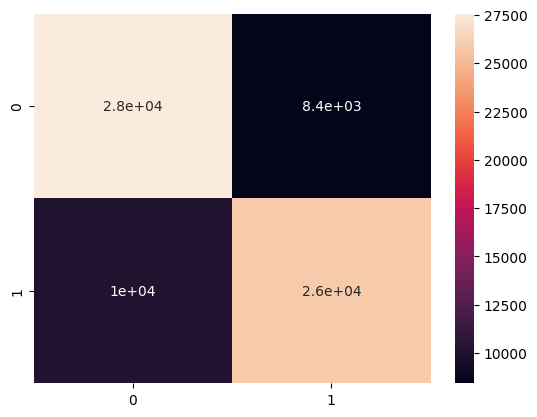

In [ ]:
sns.heatmap(cm, annot=True)

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

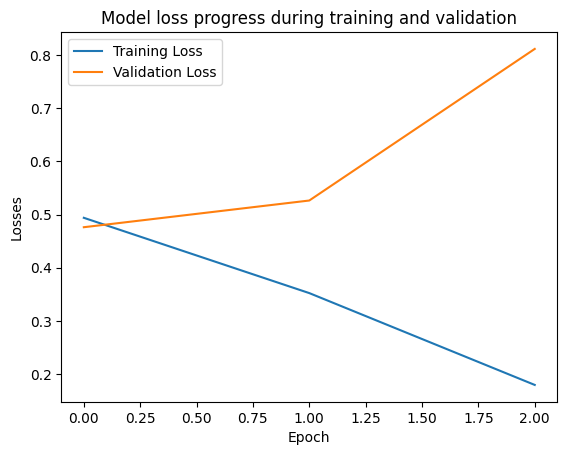

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss progress during training and validation')
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.legend(['Training Loss', 'Validation Loss'])

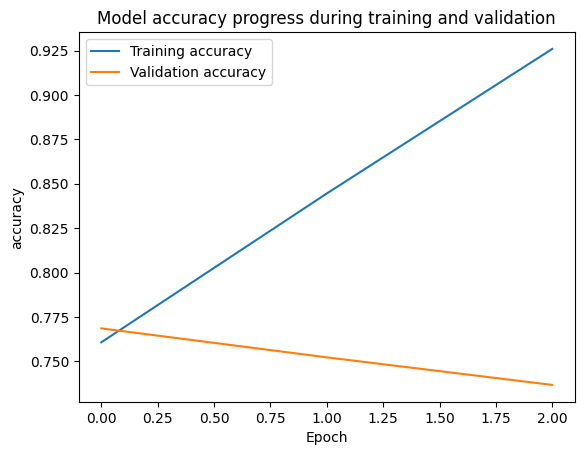

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy progress during training and validation')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])

#### Previsões

In [ ]:
text = 'i hate you'

text = tokenizer.encode(text)

Dcnn(np.array([text]), training=False).numpy()


array([[0.00027592]], dtype=float32)